In [4]:
# importing prerequesties 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report


In [5]:
# load dataset 
df=pd.read_csv("C:/Users/Prasad/Downloads/logistic_regression_students.csv")
df

,StudyHours,SleepHours,Pass
0,3.75,8.82,1
1,9.51,7.65,1
2,7.32,8.64,1
3,5.99,8.37,1
4,1.56,6.59,0
5,1.56,8.53,0
6,0.58,3.53,0
7,8.66,4.18,1
8,6.01,3.27,0
9,7.08,4.95,1


In [7]:
X=df[['StudyHours','SleepHours']]
y=df['Pass']


In [8]:
# train test spilt 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [10]:
# feature scaling
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)


In [11]:
# model building 
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

# prediciton
y_pred=log_reg.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[5 0]
 [0 5]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



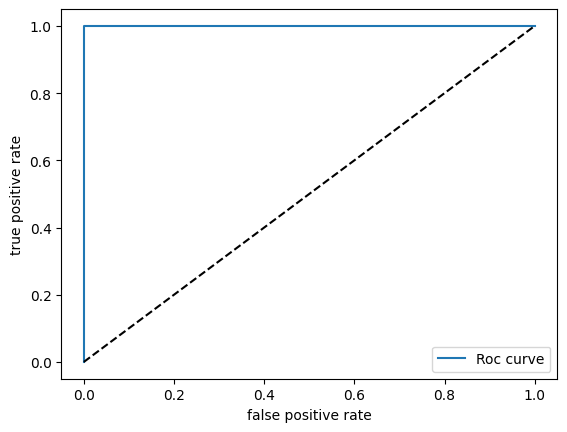

: 

In [ ]:
y_pred_prob=log_reg.predict_proba(X_test_scaled)[:,1]
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='Roc curve')
plt.plot([0,1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()